In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from collections import Counter


# Exploratory Data Analysis (EDA)

In [3]:
X_train = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/y_test.csv')

In [4]:
y_train = y_train.values.reshape(-1, )
y_test = y_test.values.reshape(-1, )

# Resampling

In [12]:
nm = NearMiss(sampling_strategy=1e-5)
X_res, y_res = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7799999, 1: 78})


In [14]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_res, y_res)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7799999, 1: 7799999})


## Decision Tree

In [15]:
decisiontree = DecisionTreeClassifier(random_state=0)
decisiontree.fit(X_res, y_res)
joblib.dump(decisiontree, '/content/drive/MyDrive/Anomaly_Detection/Files/model/DecisionTreeClassifier_resampling.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/DecisionTreeClassifier_resampling.joblib']

In [22]:
y_pred = decisiontree.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[2834158, 3215439],
       [     15,      15]])

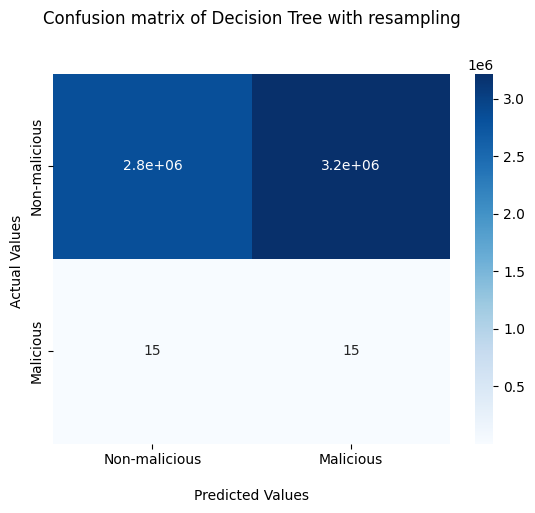

In [23]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of Decision Tree with resampling\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## SGD Classifier

In [18]:
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_res, y_res)
joblib.dump(sgd, '/content/drive/MyDrive/Anomaly_Detection/Files/model/SGDClassifier_resampling.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/SGDClassifier_resampling.joblib']

In [19]:
y_pred = sgd.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[5242685,  806912],
       [      9,      21]])

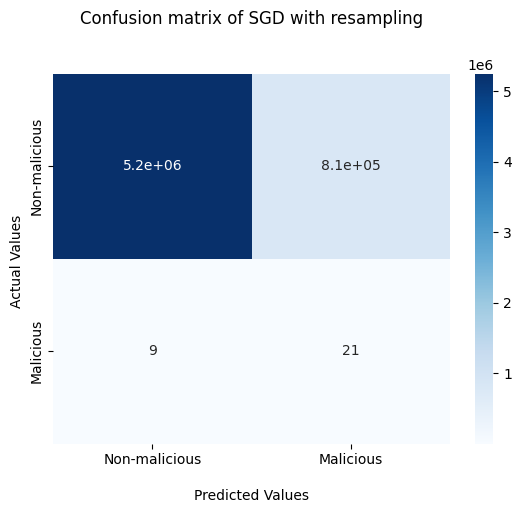

In [20]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of SGD with resampling\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## MLP Classifier

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(5,2), max_iter = 300,activation = 'relu', solver = 'adam')
mlp.fit(X_res, y_res)
joblib.dump(mlp, '/content/drive/MyDrive/Anomaly_Detection/Files/model/MLPClassifier_resampling.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/MLPClassifier_resampling.joblib']

In [25]:
y_pred = mlp.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[4699932, 1349665],
       [      7,      23]])

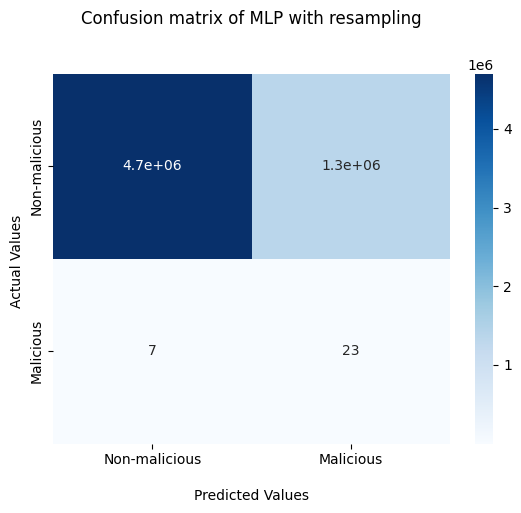

In [26]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of MLP with resampling\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## KMeans

In [27]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X_res)
joblib.dump(kmeans, '/content/drive/MyDrive/Anomaly_Detection/Files/model/KMeans_resampling.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/KMeans_resampling.joblib']

In [28]:
y_pred = kmeans.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[ 187451, 5862146],
       [     17,      13]])

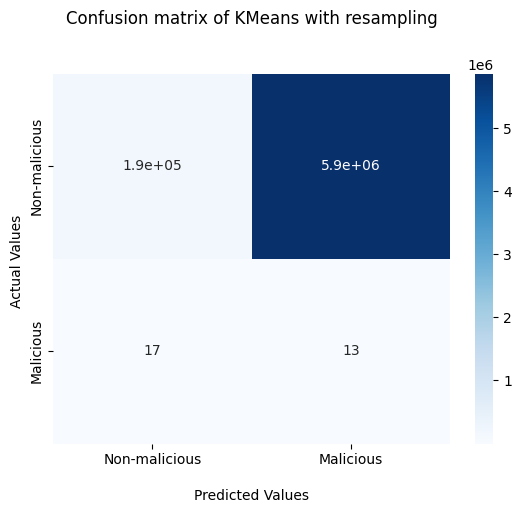

In [29]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of KMeans with resampling\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()